# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

from ipynb.fs.full.Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from ipynb.fs.full.Self_Written_Functions_Sheet import rmse

In [2]:
hp_linear_fullyimputed = pd.read_csv('../hp_linear_fullyimputed.csv')

hp_linear_fullyimputed

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_

In [3]:
hp_logsaleprice = pd.read_csv('../hp_logsaleprice.csv')

hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [4]:
# hp_tree_fullyimputed_noOutliers = hp_tree_fullyimputed.drop([523, 825, 1298])

hp_linear_fullyimputed_noOutliers = hp_linear_fullyimputed.drop([523, 825, 1298])

hp_logsaleprice_noOutliers = hp_logsaleprice.drop([523, 825, 1298])

# hp_linear_selected_noOutliers = hp_linear_selected.drop([523, 825, 1298])

In [5]:
import statsmodels.api as sm
x = sm.add_constant(hp_linear_fullyimputed_noOutliers)
mlr = sm.OLS(hp_logsaleprice_noOutliers, x)
results = mlr.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     87.10
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:03:58   Log-Likelihood:                 1454.1
No. Observations:                1457   AIC:                            -2384.
Df Residuals:                    1195   BIC:                            -999.8
Df Model:                         261                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.80

In [6]:
res_table = pd.DataFrame(results.summary().tables[1].data[1:])
res_table.columns = ['Col_Name', 'Coef', 'Std_Err', 't-value', 'p-value',
                     '0.025_confidence','0.975_confidence']
res_table = res_table.astype({'Col_Name':str, 'Coef':float, 'Std_Err':float, 't-value':float,
                              'p-value':float, '0.025_confidence':float, '0.975_confidence':float})

sig_res = res_table[res_table['p-value']<0.05]
sig_res

,Col_Name,Coef,Std_Err,t-value,p-value,0.025_confidence,0.975_confidence
0,const,5.8021,0.156,37.268,0.000,5.497,6.108
1,LotArea,0.0317,0.005,6.603,0.000,0.022,0.041
2,OverallQual,0.0504,0.006,8.107,0.000,0.038,0.063
3,OverallCond,0.0396,0.004,9.250,0.000,0.031,0.048
4,YearBuilt,0.0297,0.006,5.384,0.000,0.019,0.040
...,...,...,...,...,...,...,...
269,MSSubClass_90,-0.0369,0.018,-2.028,0.043,-0.073,-0.001
270,MSSubClass_120,-0.1167,0.049,-2.391,0.017,-0.212,-0.021
271,MSSubClass_160,-0.2508,0.052,-4.838,0.000,-0.352,-0.149
272,MSSubClass_180,-0.1824,0.057,-3.183,0.001,-0.295,-0.070


In [7]:
mlr_selected = [x for x in sig_res['Col_Name']]
hp_mlr_reduced = hp_linear_fullyimputed_noOutliers[hp_linear_fullyimputed_noOutliers.columns.intersection(mlr_selected)]
hp_mlr_reduced

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,GarageYrModified,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosN,Condition2_Feedr,Condition2_PosA,BldgType_Duplex,HouseStyle_1.5Unf,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior2nd_CmentBd,MasVnrType_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtFinType1_DNE,BsmtFinType2_BLQ,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_GdWo,SaleType_ConLD,SaleCondition_Normal,MSSubClass_30,MSSubClass_45,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,LotFrontage
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.459303,-0.793434,1.161852,0.370333,1.107810,0.789741,1.227585,0.311725,0.351000,-0.752176,-0.359325,-0.270208,1.050994,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,0.466465,0.257140,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,0.311725,-0.060731,1.626195,-0.359325,-0.270208,0.156734,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.451936
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.313369,-0.627826,1.189351,0.515013,1.107810,0.789741,1.227585,0.311725,0.631726,-0.752176,-0.359325,-0.270208,0.984752,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.687324,-0.521734,0.937276,0.383659,1.107810,-1.026041,-0.761621,1.650307,0.790804,-0.752176,4.092524,-0.270208,-1.863632,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474
4,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,0.199680,-0.045611,1.617877,1.299326,1.107810,0.789741,1.227585,1.650307,1.698485,0.780197,-0.359325,-0.270208,0.951632,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.633618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.238122,-0.542435,0.795198,0.250402,-0.819964,0.789741,1.227585,0.311725,-0.060731,-0.752176,-0.359325,-0.270208,0.918511,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.365633
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,1.104925,2.355701,-0.795163,1.061367,1.107810,0.789741,-0.761621,0.311725,0.126420,2.033231,-0.359325,-0.270208,0.222975,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,

# *Multiple Linear Regression*

In [14]:
lm = LinearRegression()

randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed,
                                                       hp_logsaleprice,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

    fitintercept = [True, False]
    norm = [True, False]

    gparam_mlr = {'fit_intercept': fitintercept,
                  'normalize': norm}

    gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_mlr.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_mlr.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_mlr, ytrain, xtrain))
    test_rmse.append(rmse(gs_mlr, ytest, xtest))
    best_par_list.append(gs_mlr.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lm_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lm_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lm_res_df_full = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_full

,Scores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.955453,0.08481,0.240816,-0.156006,True,False


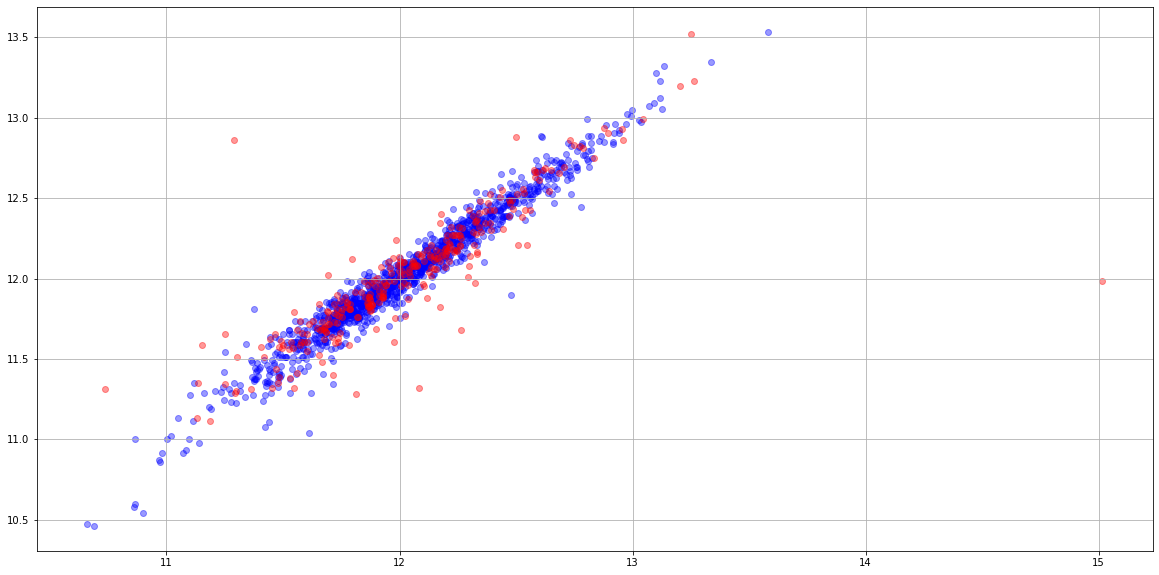

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [22]:
mlr_full_rmse = abs(lm_res_df_full['TestRMSE']) - abs(lm_res_df_full['TrainRMSE'])
mlr_full_rmse

0    0.156006
dtype: float64

- Here we can see that there is a lot of overfitting
- We will try to remove the outliers to close the gap

## Without Outliers

In [19]:
lm = LinearRegression()

randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed_noOutliers,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

    fitintercept = [True, False]
    norm = [True, False]

    gparam_mlr = {'fit_intercept': fitintercept,
                  'normalize': norm}

    gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_mlr.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_mlr.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_mlr, ytrain, xtrain))
    test_rmse.append(rmse(gs_mlr, ytest, xtest))
    best_par_list.append(gs_mlr.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lm_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lm_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lm_res_df_out = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_out

,Scores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.952582,0.086326,0.11825,-0.031923,True,False


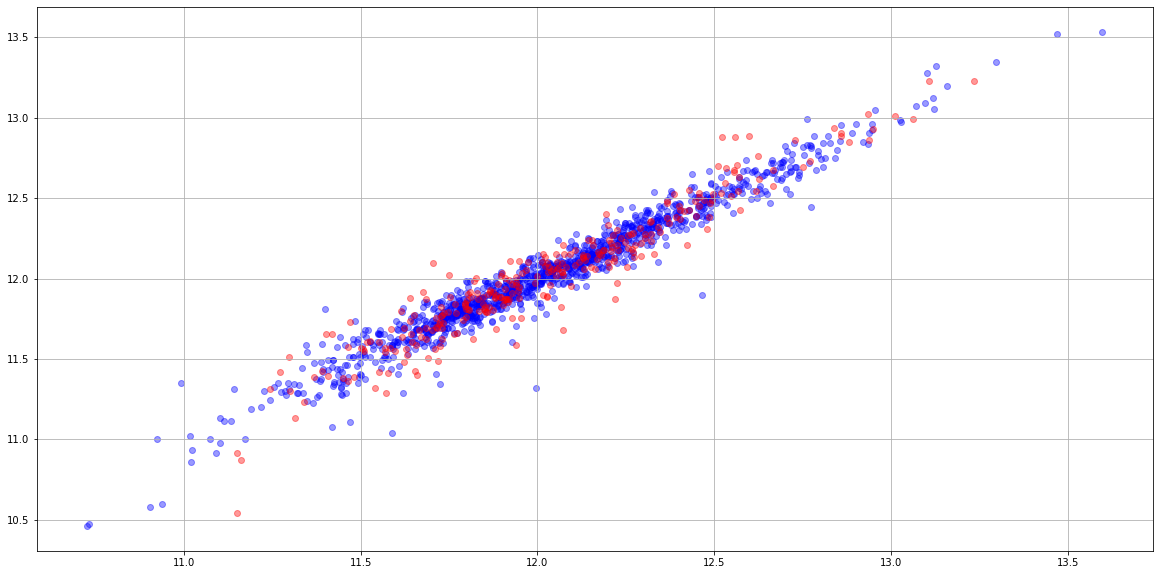

In [20]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [23]:
mlr_out_rmse = abs(lm_res_df_out['TestRMSE']) - abs(lm_res_df_out['TrainRMSE'])
mlr_out_rmse

0    0.031923
dtype: float64

- We can see that there is less overfitting when we remove the outliers

## Using reduced DF

In [24]:
lm = LinearRegression()

randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_mlr_reduced,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

    fitintercept = [True, False]
    norm = [True, False]

    gparam_mlr = {'fit_intercept': fitintercept,
                  'normalize': norm}

    gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_mlr.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_mlr.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_mlr, ytrain, xtrain))
    test_rmse.append(rmse(gs_mlr, ytest, xtest))
    best_par_list.append(gs_mlr.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lm_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lm_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lm_res_df_sel = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel

,Scores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.93435,0.101576,0.120275,-0.018699,True,True


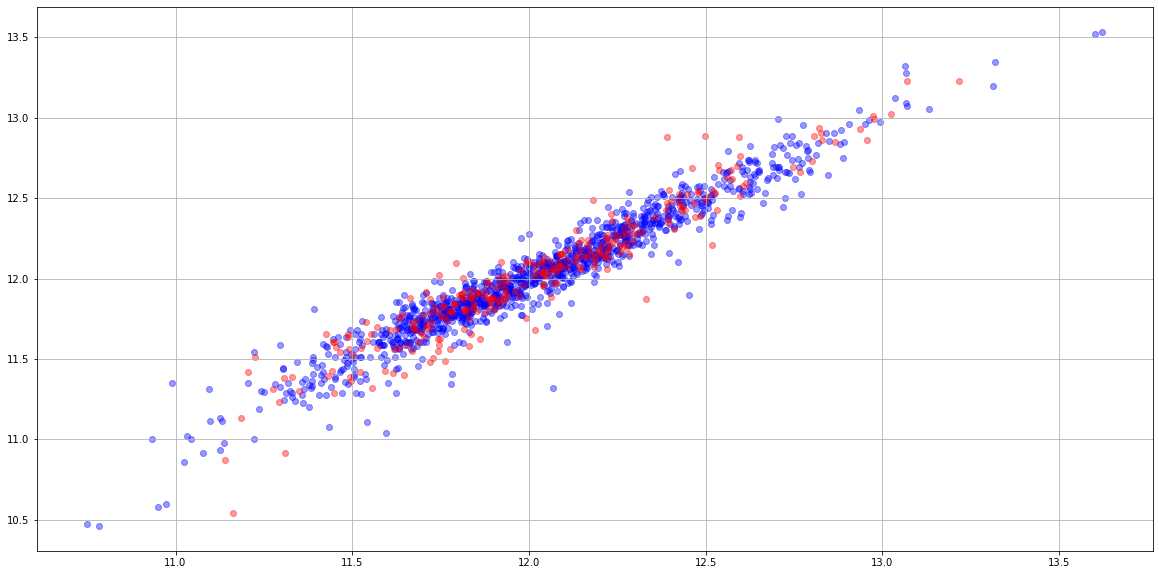

In [25]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [26]:
mlr_sel_rmse = abs(lm_res_df_sel['TestRMSE']) - abs(lm_res_df_sel['TrainRMSE'])
mlr_sel_rmse

0    0.018699
dtype: float64

- The train test RMSE increased, but the TestRMSE decreased
- Because there is less overfitting, this may be a better dataset to use

# *Penalized Linear Regressions*

In [29]:
randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed,
                                                       hp_logsaleprice,
                                                       test_size=0.2,
                                                       random_state=state)
    ytrain = ytrain.values.flatten()
    
    lasso = Lasso(random_state=state, max_iter=1000000, selection='random', normalize=True)
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    alphas = np.linspace(1e-4, 2.5e-4, 30)
    fitintercept = [True]
#     norm = [True, False]

    gparam_lasso = {'alpha': alphas,
                    'fit_intercept': fitintercept}

    gs_lasso = ms.GridSearchCV(lasso, gparam_lasso, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_lasso.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_lasso.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_lasso, ytrain, xtrain))
    test_rmse.append(rmse(gs_lasso, ytest, xtest))
    best_par_list.append(gs_lasso.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lasso_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lasso_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lasso_res_df_full = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_full

,Scores,TrainRMSE,TestRMSE,DiffRMSE,alpha,fit_intercept
0,0.93198,0.104798,0.221812,-0.117013,0.000157,True


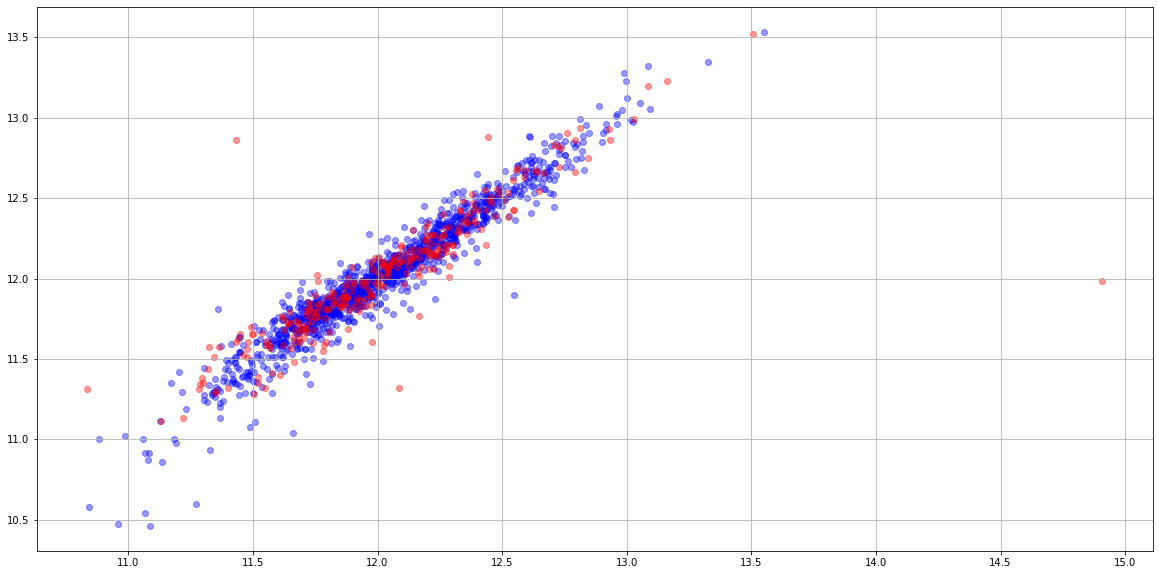

In [30]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [31]:
lasso_full_rmse = abs(lm_res_df_full['TestRMSE']) - abs(lm_res_df_full['TrainRMSE'])
lasso_full_rmse

0    0.156006
dtype: float64

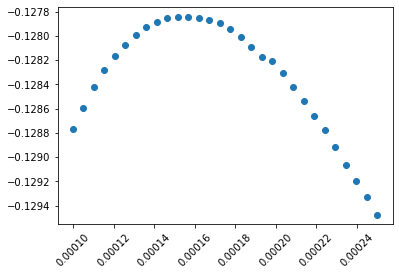

In [32]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

## Without Outliers

In [33]:
randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed_noOutliers,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)
    ytrain = ytrain.values.flatten()
    
    lasso = Lasso(random_state=state, max_iter=1000000, selection='random', normalize=True)
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    alphas = np.linspace(5e-5, 2.5e-4, 30)
    fitintercept = [True]
#     norm = [True, False]

    gparam_lasso = {'alpha': alphas,
                    'fit_intercept': fitintercept}

    gs_lasso = ms.GridSearchCV(lasso, gparam_lasso, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_lasso.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_lasso.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_lasso, ytrain, xtrain))
    test_rmse.append(rmse(gs_lasso, ytest, xtest))
    best_par_list.append(gs_lasso.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lasso_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lasso_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lasso_res_df_out = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_out

,Scores,TrainRMSE,TestRMSE,DiffRMSE,alpha,fit_intercept
0,0.933746,0.102042,0.114177,-0.012135,0.000119,True


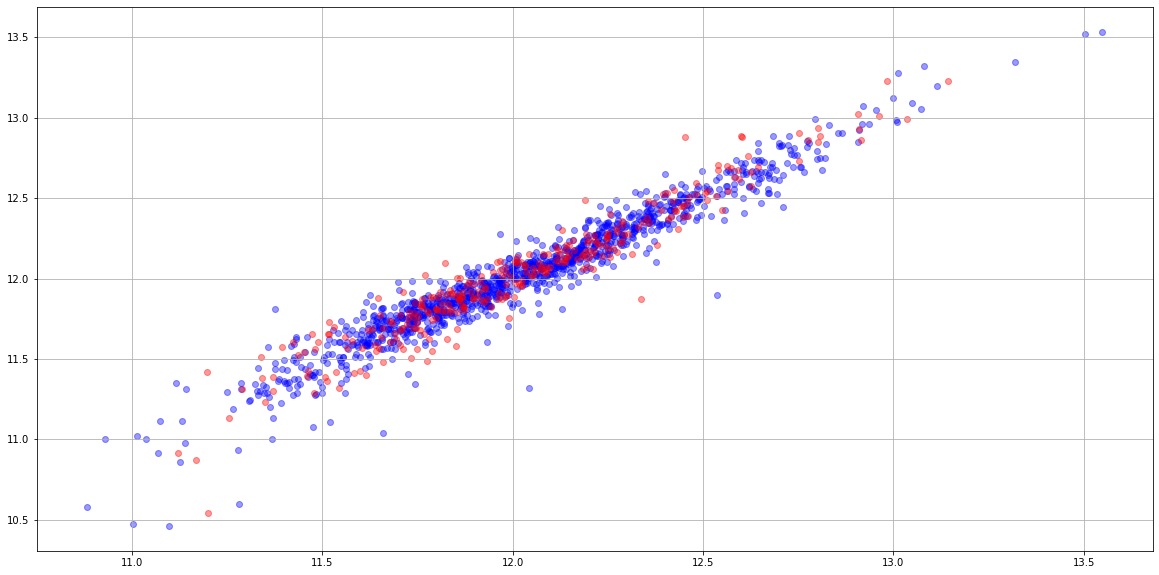

In [34]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [35]:
lasso_out_rmse = abs(lm_res_df_out['TestRMSE']) - abs(lm_res_df_out['TrainRMSE'])
lasso_out_rmse

0    0.031923
dtype: float64

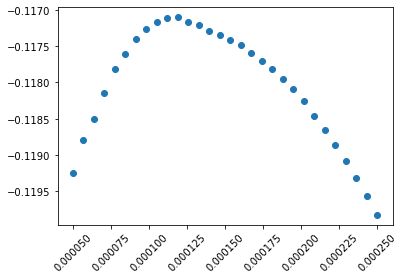

In [106]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

## Using reduced DF

In [36]:
randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_mlr_reduced,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)
    ytrain = ytrain.values.flatten()
    
    lasso = Lasso(random_state=state, max_iter=1000000, selection='random', normalize=True)
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    alphas = np.linspace(1e-8, 1e-4, 30)
    fitintercept = [True]
#     norm = [True, False]

    gparam_lasso = {'alpha': alphas,
                    'fit_intercept': fitintercept}

    gs_lasso = ms.GridSearchCV(lasso, gparam_lasso, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_lasso.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_lasso.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_lasso, ytrain, xtrain))
    test_rmse.append(rmse(gs_lasso, ytest, xtest))
    best_par_list.append(gs_lasso.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lasso_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lasso_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lasso_res_df_sel = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_sel

,Scores,TrainRMSE,TestRMSE,DiffRMSE,alpha,fit_intercept
0,0.931943,0.103421,0.118461,-0.01504,0.000031,True


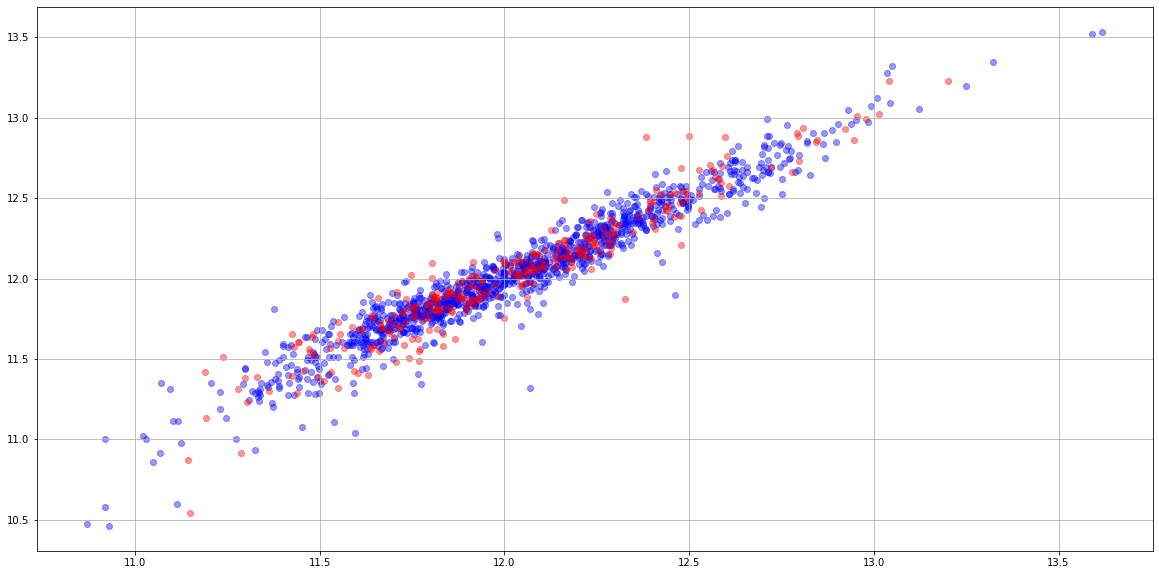

In [37]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [38]:
lasso_sel_rmse = abs(lm_res_df_sel['TestRMSE']) - abs(lm_res_df_sel['TrainRMSE'])
lasso_sel_rmse

0    0.018699
dtype: float64

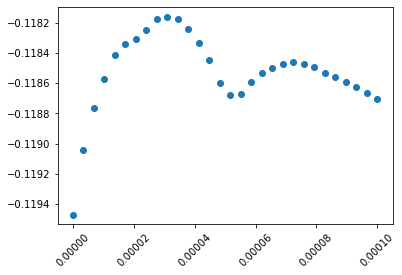

In [39]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

### Select more important features after lasso

In [40]:
lasso_coef = pd.Series(gs_lasso.best_estimator_.coef_, index=hp_mlr_reduced.columns)
print(lasso_coef.abs().sort_values(ascending=False).to_string())

Functional_Sev          0.460161
Exterior1st_BrkComm     0.334921
MSZoning_FV             0.313893
MSZoning_RL             0.237140
MSZoning_RH             0.227531
Functional_Maj2         0.214699
MSZoning_RM             0.174276
RoofMatl_Metal          0.173357
RoofMatl_Membran        0.165345
GrLivArea               0.135993
Foundation_Wood         0.135252
Neighborhood_Crawfor    0.132265
MSSubClass_160          0.110191
GarageQual_Gd           0.106626
GarageQual_Ex           0.096887
MSSubClass_90           0.089178
RoofMatl_Tar&Grv        0.077348
OverallQual             0.077095
LandSlope_Sev           0.076528
Neighborhood_MeadowV    0.072167
Neighborhood_StoneBr    0.063923
KitchenQual_TA          0.063614
BsmtQual_Ex             0.061124
GarageYrModified        0.060636
CentralAir_Y            0.059190
BsmtCond_Fa             0.057551
KitchenQual_Gd          0.057548
TotalBsmtSF             0.052978
BsmtExposure_Gd         0.047369
OverallCond             0.043260
Condition2

In [41]:
lasso_coef = pd.Series(gs_lasso.best_estimator_.coef_)

lasso_coef_index = [i for i, x in enumerate(lasso_coef) if abs(x) > 0]

hp_lasso_reduced = hp_mlr_reduced.iloc[:,lasso_coef_index]

hp_lasso_reduced

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,GarageYrModified,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosN,Condition2_Feedr,Condition2_PosA,BldgType_Duplex,HouseStyle_1.5Unf,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_BrkComm,MasVnrType_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_TA,BsmtCond_Fa,BsmtExposure_Gd,BsmtFinType1_DNE,BsmtFinType2_BLQ,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_TA,Fence_GdWo,SaleType_ConLD,SaleCondition_Normal,MSSubClass_30,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,LotFrontage
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.459303,1.161852,0.370333,1.107810,0.789741,1.227585,0.311725,0.351000,-0.752176,-0.359325,-0.270208,1.050994,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,-0.229372
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,0.466465,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,0.311725,-0.060731,1.626195,-0.359325,-0.270208,0.156734,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.451936
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.313369,1.189351,0.515013,1.107810,0.789741,1.227585,0.311725,0.631726,-0.752176,-0.359325,-0.270208,0.984752,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,-0.093110
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.687324,0.937276,0.383659,1.107810,-1.026041,-0.761621,1.650307,0.790804,-0.752176,4.092524,-0.270208,-1.863632,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,-0.456474
4,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,0.199680,1.617877,1.299326,1.107810,0.789741,1.227585,1.650307,1.698485,0.780197,-0.359325,-0.270208,0.951632,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.633618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.238122,0.795198,0.250402,-0.819964,0.789741,1.227585,0.311725,-0.060731,-0.752176,-0.359325,-0.270208,0.918511,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,-0.365633
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,1.104925,-0.795163,1.061367,1.107810,0.789741,-0.761621,0.311725,0.126420,2.033231,-0.359325,-0.270208,0.222975,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.679039
1457,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,0.215641,1.844744,1.569647,-0.819964,0.789741,-0.761621,-1.026858,-1.033914,-0.752176,-0.359325,-0.270208,-1.002492,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,-0.183951
1458,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.865548,0.046905,-0.795163,-0.832788,1.107810,-1.026041,-0.761621,-1.026858,-1.090059

In [42]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef) if abs(x) > 0.01]

hp_lasso_reduced_01 = hp_mlr_reduced.iloc[:,lasso_coef_index_01]

hp_lasso_reduced_01

,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,HalfBath,GarageCars,GarageArea,ScreenPorch,GarageYrModified,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosN,Condition2_Feedr,Condition2_PosA,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_BrkComm,MasVnrType_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_TA,BsmtCond_Fa,BsmtExposure_Gd,BsmtFinType1_DNE,BsmtFinType2_BLQ,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Ex,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_TA,Fence_GdWo,SaleType_ConLD,SaleCondition_Normal,MSSubClass_30,MSSubClass_90,MSSubClass_160,MSSubClass_180
0,-0.207142,0.651479,-0.517200,0.878668,0.575425,-0.459303,0.370333,1.107810,1.227585,0.311725,0.351000,-0.270208,1.050994,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
1,-0.091886,-0.071836,2.179628,-0.429577,1.171992,0.466465,-0.482512,-0.819964,-0.761621,0.311725,-0.060731,-0.270208,0.156734,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
2,0.073480,0.651479,-0.517200,0.830215,0.092907,-0.313369,0.515013,1.107810,1.227585,0.311725,0.631726,-0.270208,0.984752,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
3,-0.096897,0.651479,-0.517200,-0.720298,-0.499274,-0.687324,0.383659,1.107810,-0.761621,1.650307,0.790804,-0.270208,-1.863632,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,0.0
4,0.375148,1.374795,-0.517200,0.733308,0.463568,0.199680,1.299326,1.107810,1.227585,1.650307,1.698485,-0.270208,0.951632,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.733308,-0.973018,-0.238122,0.250402,-0.819964,1.227585,0.311725,-0.060731,-0.270208,0.918511,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
1456,0.266407,-0.071836,0.381743,0.151865,0.759659,1.104925,1.061367,1.107810,-0.761621,0.311725,0.126420,-0.270208,0.222975,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
1457,-0.147810,0.651479,3.078570,1.024029,-0.369871,0.215641,1.569647,-0.819964,-0.761621,-1.026858,-1.033914,-0.270208,-1.002492,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0
1458,-0.080160,-0.795151,0.381743,0.539493,-0.865548,0.046905,-0.832788,1.107810,-0.761621,-1.026858,-1.090059,-0.270208,-0.704406,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,0.0


## Using Lasso Reduced Features with MLR

In [43]:
lm = LinearRegression()

randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_lasso_reduced,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

    fitintercept = [True, False]
    norm = [True, False]

    gparam_mlr = {'fit_intercept': fitintercept,
                  'normalize': norm}

    gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_mlr.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_mlr.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_mlr, ytrain, xtrain))
    test_rmse.append(rmse(gs_mlr, ytest, xtest))
    best_par_list.append(gs_mlr.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lm_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lm_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lm_res_df_sel1 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel1

,Scores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.934055,0.101803,0.11889,-0.017086,True,True


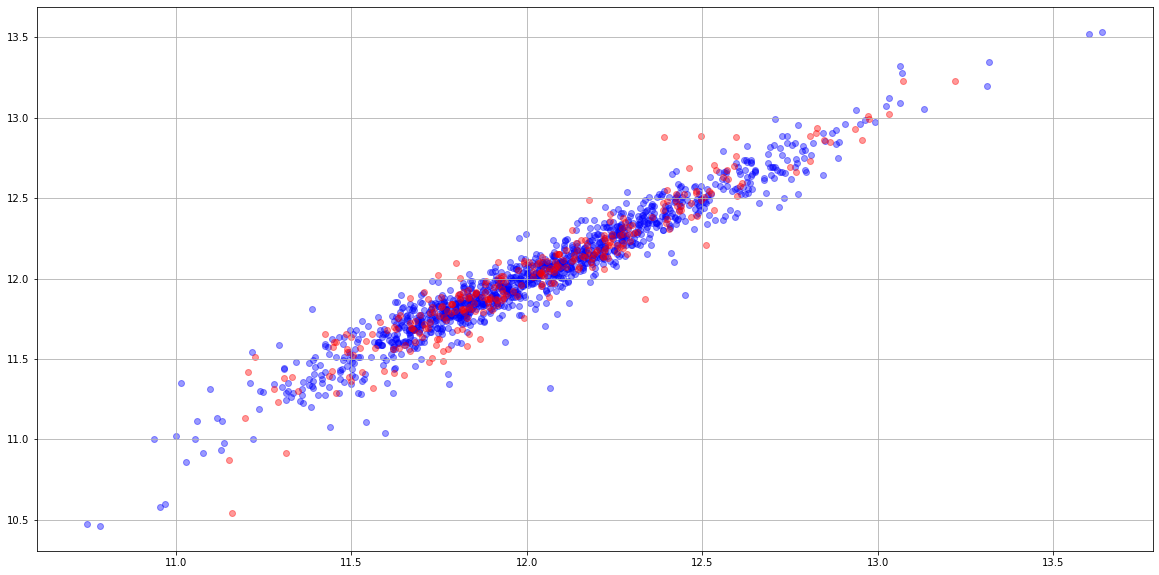

In [44]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [46]:
print(mlr_sel_rmse)
mlr_sel1_rmse = abs(lm_res_df_sel1['TestRMSE']) - abs(lm_res_df_sel1['TrainRMSE'])
print(mlr_sel1_rmse)
mlr_sel_rmse - mlr_sel1_rmse

0    0.018699
dtype: float64
0    0.017086
dtype: float64


0    0.001613
dtype: float64

In [47]:
lm = LinearRegression()

randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_lasso_reduced_01,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

    fitintercept = [True, False]
    norm = [True, False]

    gparam_mlr = {'fit_intercept': fitintercept,
                  'normalize': norm}

    gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_mlr.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_mlr.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_mlr, ytrain, xtrain))
    test_rmse.append(rmse(gs_mlr, ytest, xtest))
    best_par_list.append(gs_mlr.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lm_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lm_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

,Scores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.932921,0.102675,0.119739,-0.017064,True,False


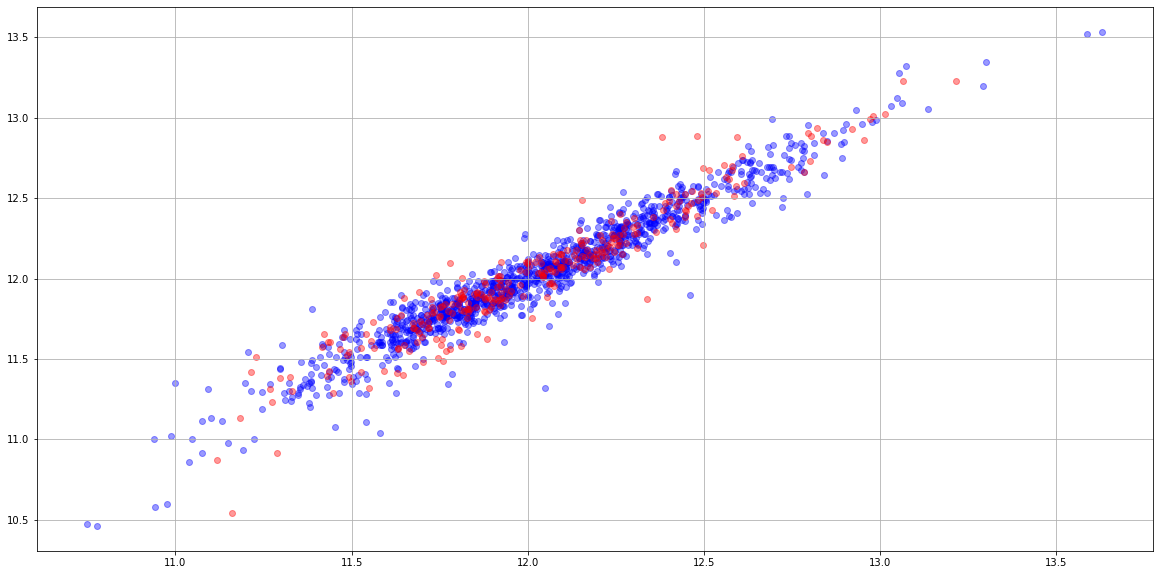

In [48]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [49]:
print(mlr_sel_rmse)
mlr_sel2_rmse = abs(lm_res_df_sel2['TestRMSE']) - abs(lm_res_df_sel2['TrainRMSE'])
print(mlr_sel2_rmse)
mlr_sel_rmse - mlr_sel2_rmse

0    0.018699
dtype: float64
0    0.017064
dtype: float64


0    0.001635
dtype: float64

- Based on the above, it seems that using 0 is better than using 0.01 as a cutoff for the lasso-derived dataset

## Using Lasso Reduced Features with Lasso

In [53]:
randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_lasso_reduced,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)
    ytrain = ytrain.values.flatten()
    
    lasso = Lasso(random_state=state, max_iter=1000000, selection='random', normalize=True)
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    alphas = np.linspace(1e-8, 1e-4, 30)
    fitintercept = [True]
#     norm = [True, False]

    gparam_lasso = {'alpha': alphas,
                    'fit_intercept': fitintercept}

    gs_lasso = ms.GridSearchCV(lasso, gparam_lasso, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_lasso.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_lasso.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_lasso, ytrain, xtrain))
    test_rmse.append(rmse(gs_lasso, ytest, xtest))
    best_par_list.append(gs_lasso.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lasso_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lasso_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lasso_res_df_sel1 = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_sel1

,Scores,TrainRMSE,TestRMSE,DiffRMSE,alpha,fit_intercept
0,0.933788,0.102009,0.118611,-0.016602,0.00001,True


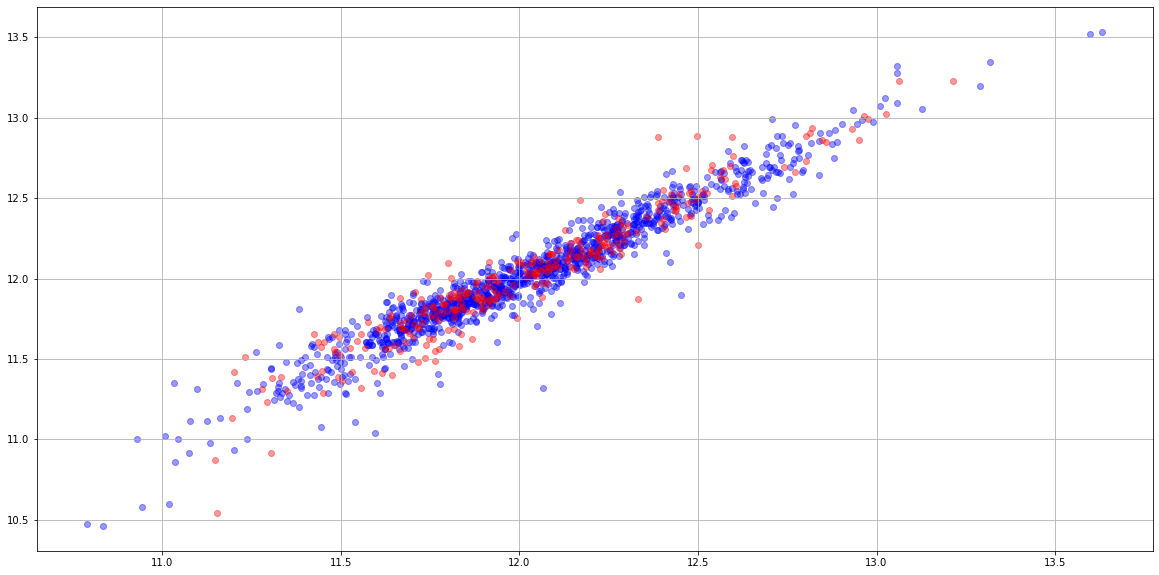

In [54]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [56]:
print(lasso_sel_rmse)
lasso_sel1_rmse = abs(lasso_res_df_sel1['TestRMSE']) - abs(lasso_res_df_sel1['TrainRMSE'])
print(lasso_sel1_rmse)
lasso_sel_rmse - lasso_sel1_rmse

0    0.018699
dtype: float64
0    0.016602
dtype: float64


0    0.002097
dtype: float64

In [58]:
randomstate = [0]

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_lasso_reduced_01,
                                                       hp_logsaleprice_noOutliers,
                                                       test_size=0.2,
                                                       random_state=state)
    ytrain = ytrain.values.flatten()
    
    lasso = Lasso(random_state=state, max_iter=1000000, selection='random', normalize=True)
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    alphas = np.linspace(1e-8, 1e-4, 30)
    fitintercept = [True]
#     norm = [True, False]

    gparam_lasso = {'alpha': alphas,
                    'fit_intercept': fitintercept}

    gs_lasso = ms.GridSearchCV(lasso, gparam_lasso, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_lasso.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_lasso.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_lasso, ytrain, xtrain))
    test_rmse.append(rmse(gs_lasso, ytest, xtest))
    best_par_list.append(gs_lasso.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lasso_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lasso_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lasso_res_df_sel2 = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_sel2

,Scores,TrainRMSE,TestRMSE,DiffRMSE,alpha,fit_intercept
0,0.932591,0.102928,0.11943,-0.016502,0.000014,True


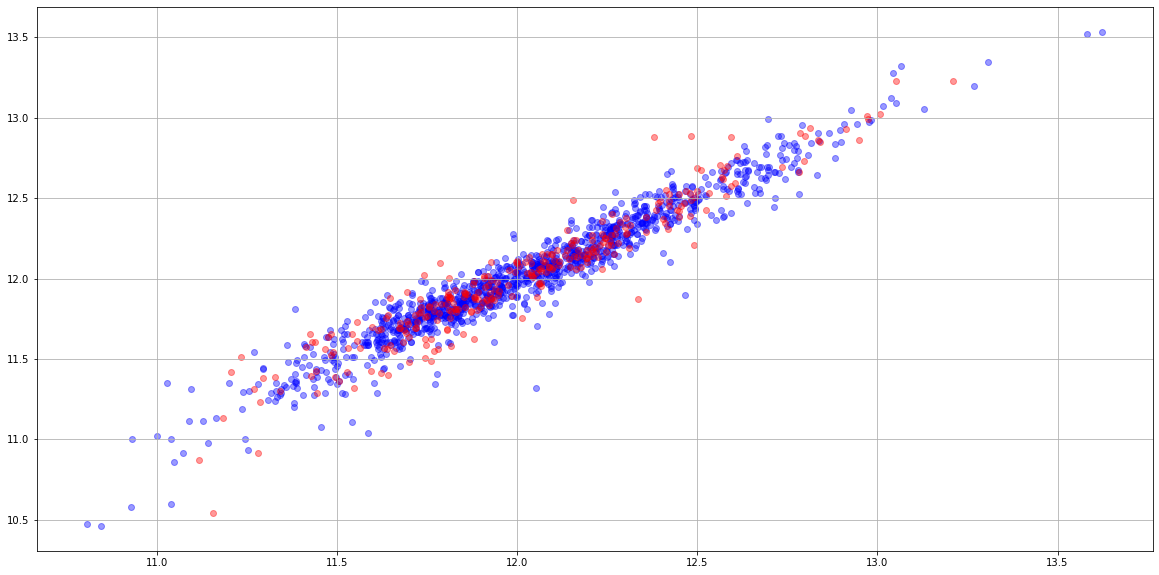

In [59]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [61]:
print(lasso_sel1_rmse)
lasso_sel2_rmse = abs(lasso_res_df_sel2['TestRMSE']) - abs(lasso_res_df_sel2['TrainRMSE'])
print(lasso_sel2_rmse)
lasso_sel_rmse - lasso_sel2_rmse

0    0.016602
dtype: float64
0    0.016502
dtype: float64


0    0.002197
dtype: float64

In [ ]:
# Using Lasso Reduced Dataset to predict

#### Outlier on right side

In [10]:
# Create dataframe of xtest predictions
df_xtest = pd.DataFrame(gs_lasso.predict(xtest))
df_xtest.rename(columns={0:'SalePrice'}, inplace=True)

# Determine the highest value of the xtest predictions
plug_in = df_xtest[df_xtest['SalePrice']==gs_lasso.predict(xtest).max()]

# Plug that value into ytest to get the 'name' (which is actually the index) of the value 
ytest.iloc[plug_in.index]

,SalePrice
1298,11.982929


## The above was also an outlier in ML_HousingPrice_EDA_and_Basic_Imputation GrLivArea Exploration

#### Outlier on Left Side

In [11]:
# Creates list of indices that are within the specified bounds of ytest
ytest_ind = list(ytest[(ytest['SalePrice']>12.75) & (ytest['SalePrice']<13)]['SalePrice'].index)

# check for the indices around where our target may lie on the x axis
df_xtest[(df_xtest['SalePrice']>11.3) & (df_xtest['SalePrice']<11.6)]

# Creates list of indices that are within the specified bounds of df_xtest
xtest_ind = list(df_xtest[(df_xtest['SalePrice']>11.3) & (df_xtest['SalePrice']<11.6)]['SalePrice'].index)

# Creates list of indices that are within the specified bounds of ytest using xtest_ind
comparison_list = list(ytest.iloc[xtest_ind]['SalePrice'].index)
set(ytest_ind) & set(comparison_list)

{825}

### In ML_HousingPrice_EDA_and_Basic_Imputation, we saw that 523 was also an outlier

## Delete the outliers in the features and labels

In [12]:
# hp_tree_fullyimputed_noOutliers = hp_tree_fullyimputed.drop([523, 825, 1298])

hp_linear_fullyimputed_noOutliers = hp_linear_fullyimputed.drop([523, 825, 1298])

hp_logsaleprice_noOutliers = hp_logsaleprice.drop([523, 825, 1298])

hp_linear_selected_noOutliers = hp_linear_selected.drop([523, 825, 1298])

# Run Multiple Linear Regression without outliers

In [16]:
xtrain_out, xtest_out, ytrain_out, ytest_out = ms.train_test_split(hp_linear_fullyimputed_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=0)

ytrain_out = ytrain_out.values.flatten()



n_folds = ms.KFold(n_splits=5, random_state=0, shuffle=True)

Wall time: 286 ms
##################################################


Currently, the best parameters are:  {'fit_intercept': True, 'normalize': False}
##################################################


The best score is:  0.9525818706916774
##################################################


The RMSE is:  0.08632649075361402
##################################################


The test set RMSE is:  0.11824963394447822


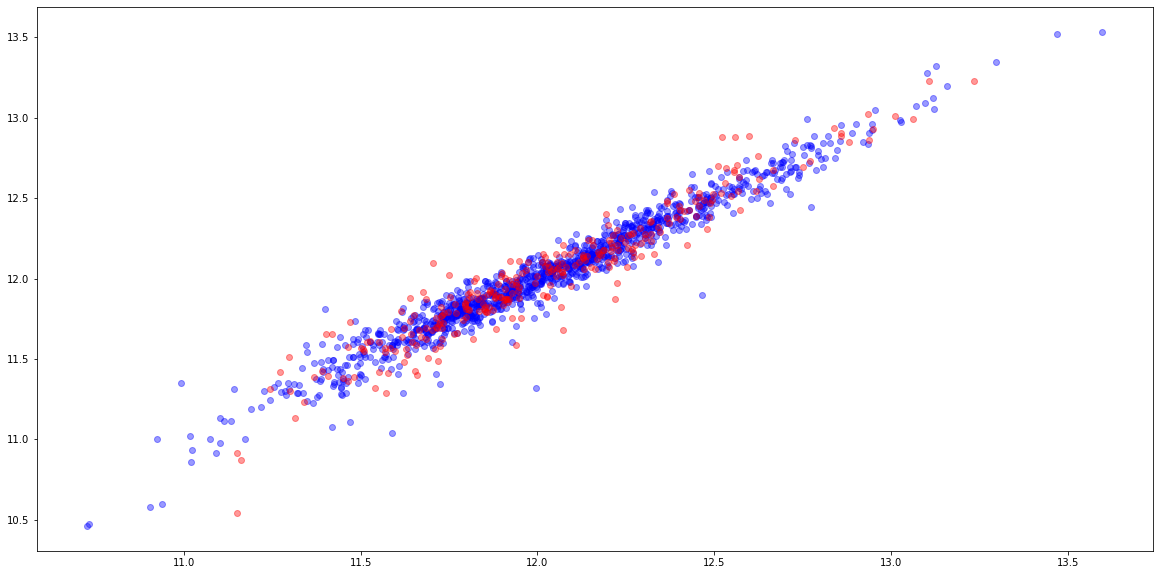

In [17]:
lm = LinearRegression()

fitintercept = [True, False]
norm = [True, False]

gparam_mlr = {'fit_intercept': fitintercept,
              'normalize': norm}

gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_out, ytrain_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_mlr.best_params_)

# print('where the alpha is: ', gs_mlr.best_params_['alpha'])
# print('and the L1 ratio is: ', gs_mlr.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_mlr.best_estimator_.score(xtrain_out, ytrain_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_mlr, ytrain_out, xtrain_out))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_mlr, ytest_out, xtest_out))

plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_out), ytrain_out, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_out), ytest_out, color='red', alpha=0.4)

## Re-run Lasso

In [18]:
xtrain_out, xtest_out, ytrain_out, ytest_out = ms.train_test_split(hp_linear_fullyimputed_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=0)

ytrain_out = ytrain_out.values.flatten()

n_folds = ms.KFold(n_splits=5, random_state=0, shuffle=True)

In [19]:
lasso = Lasso(random_state=0, max_iter=1000000, normalize=True)

alphas = np.linspace(1e-8, 0.0004, 30)

gparam_lasso_tree = [{'alpha': alphas}]

gs_lasso_tree = GridSearchCV(lasso,
                             gparam_lasso_tree, 
                             cv=n_folds,
                             scoring='neg_root_mean_squared_error',
                             return_train_score=True)

%time gs_lasso_tree.fit(xtrain_out, ytrain_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso_tree.best_params_)

print('where the alpha is: ', gs_lasso_tree.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso_tree.best_estimator_.score(xtrain_out, ytrain_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso_tree, ytrain_out, xtrain_out))

Wall time: 2min 37s
##################################################


Currently, the best parameters are:  {'alpha': 0.00011035206896551725}
where the alpha is:  0.00011035206896551725
##################################################


The best score is:  0.9345866909891389
##################################################


The RMSE is:  0.10139229141509248


(array([-5.0e-05,  0.0e+00,  5.0e-05,  1.0e-04,  1.5e-04,  2.0e-04,
         2.5e-04,  3.0e-04,  3.5e-04,  4.0e-04,  4.5e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

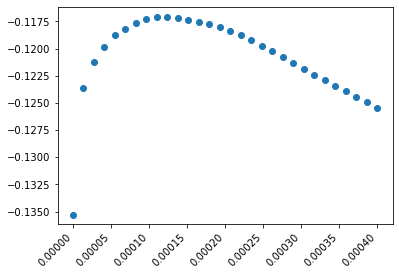

In [20]:
plt.scatter(gs_lasso_tree.cv_results_['param_alpha'], gs_lasso_tree.cv_results_['mean_test_score'])
plt.xticks(rotation=45, ha='right')

The test set RMSE is:  0.11409577660787094


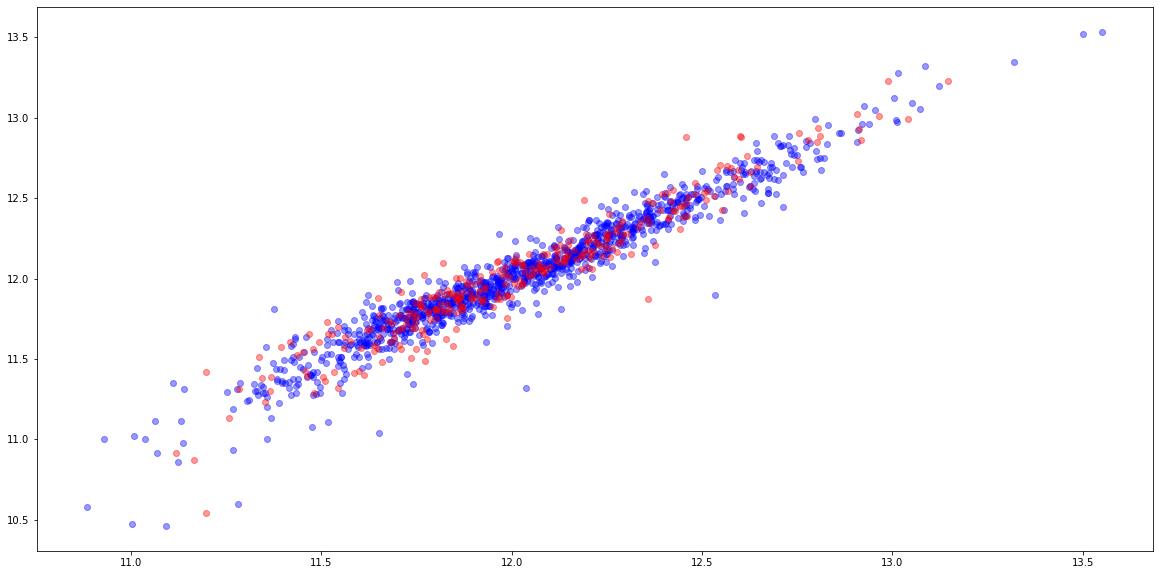

In [21]:
print('The test set RMSE is: ', rmse(gs_lasso_tree, ytest_out, xtest_out))

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_tree.best_estimator_.predict(xtrain_out), ytrain_out, color='blue', alpha=0.4)
plt.scatter(gs_lasso_tree.best_estimator_.predict(xtest_out), ytest_out, color='red', alpha=0.4)

## Run using selected columns

In [22]:
xtrain_sel, xtest_sel, ytrain_sel, ytest_sel = ms.train_test_split(hp_linear_selected_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=0)

ytrain_sel = ytrain_sel.values.flatten()

lasso = Lasso(random_state=0, max_iter=1000000, normalize=True)

n_folds = ms.KFold(n_splits=5, random_state=0, shuffle=True)

Wall time: 35.8 s
##################################################


Currently, the best parameters are:  {'alpha': 4.483310344827587e-05}
where the alpha is:  4.483310344827587e-05
##################################################


The best score is:  0.9359705630512155
##################################################


The RMSE is:  0.1003140396720288
##################################################


The test set RMSE is:  0.11127390887061178


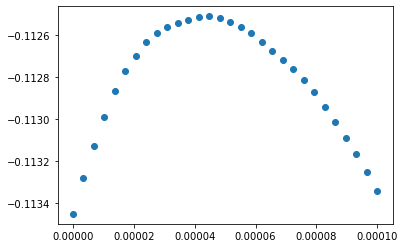

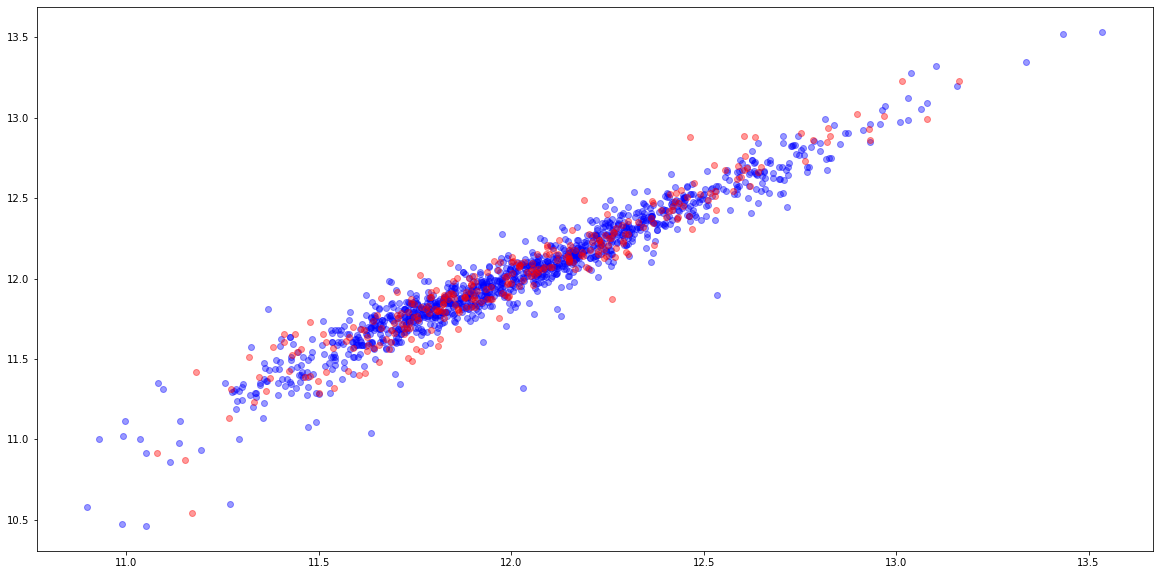

In [23]:
alphas = np.linspace(1e-8, 1e-4, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_lasso, ytest_sel, xtest_sel))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

# Run Multi Linear Regression

# Run Elastic Net

Wall time: 1min 19s
##################################################


Currently, the best parameters are:  {'alpha': 6.158482110660255e-05, 'l1_ratio': 0.3792690190732246}
where the alpha is:  6.158482110660255e-05
and the L1 ratio is:  0.3792690190732246
##################################################


The best score is:  0.9356183756304264
##################################################


The RMSE is:  0.10058954494246958
##################################################


The test set RMSE is:  0.11197295644633358


C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


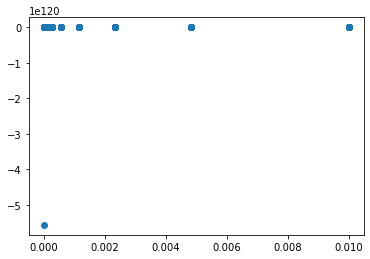

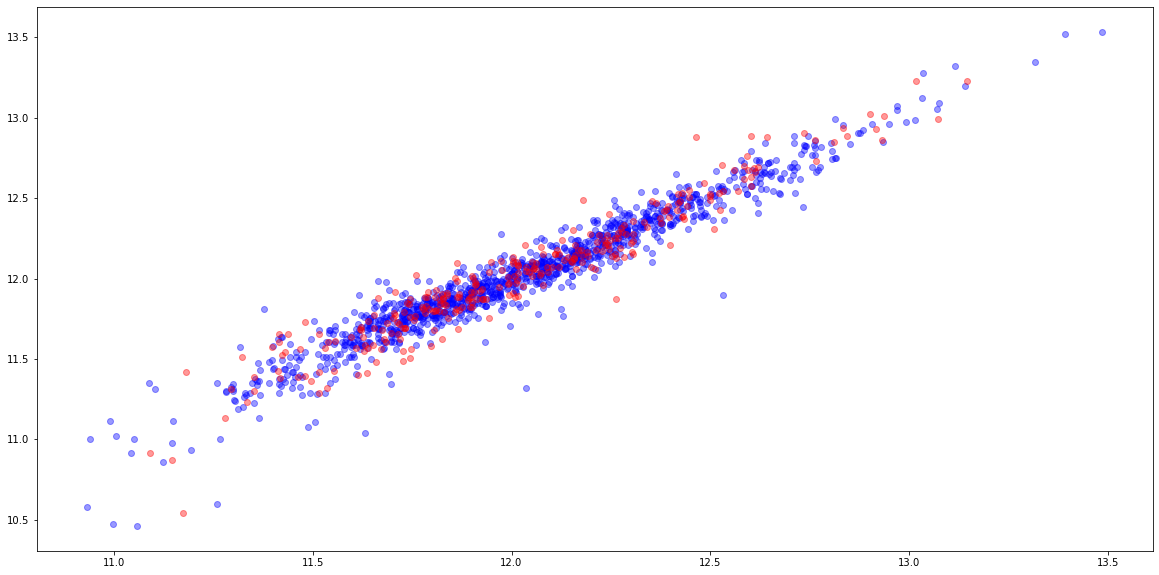

In [24]:
enet = ElasticNet(random_state=0, max_iter=10000, normalize=True)

alphas = np.logspace(-8, -2, 20)
rhos = np.logspace(-8, 1, 20)

gparam_enet = {'l1_ratio': rhos, 'alpha': alphas}

gs_enet = GridSearchCV(enet, gparam_enet, cv=n_folds, refit=True, n_jobs=-1,
                       scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_enet.best_params_)

print('where the alpha is: ', gs_enet.best_params_['alpha'])
print('and the L1 ratio is: ', gs_enet.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_enet.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_enet, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.scatter(gs_enet.cv_results_['param_alpha'], gs_enet.cv_results_['mean_test_score'])


plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

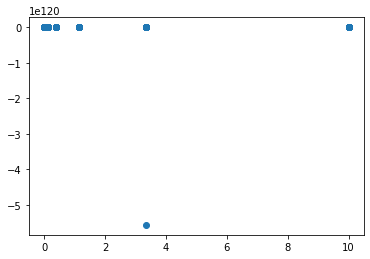

In [25]:
plt.scatter(gs_enet.cv_results_['param_l1_ratio'], gs_enet.cv_results_['mean_test_score'])

The test set RMSE is:  0.11197295644633358


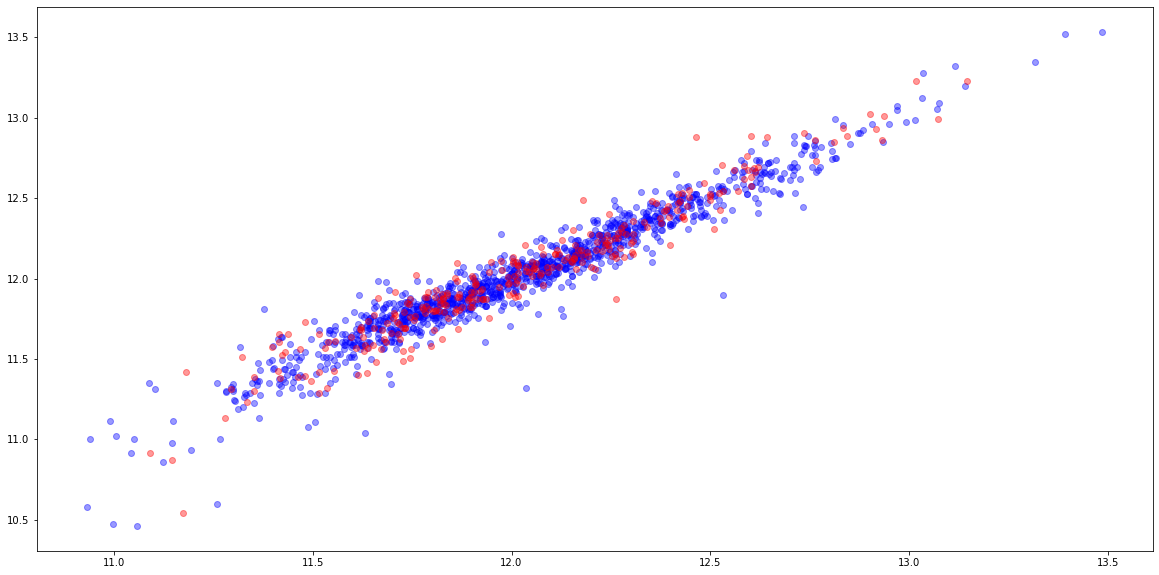

In [26]:
print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

Wall time: 23.2 s
##################################################


Currently, the best parameters are:  {'alpha': 0.006723357536499335, 'l1_ratio': 0.001}
where the alpha is:  0.006723357536499335
and the L1 ratio is:  0.001
##################################################


The best score is:  0.9343828148165512
##################################################


The RMSE is:  0.10155017511471513
##################################################


The test set RMSE is:  0.11097371915835408


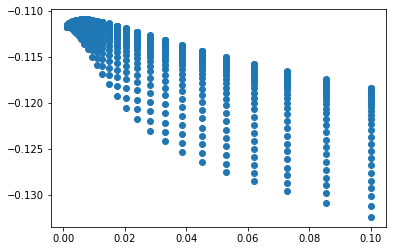

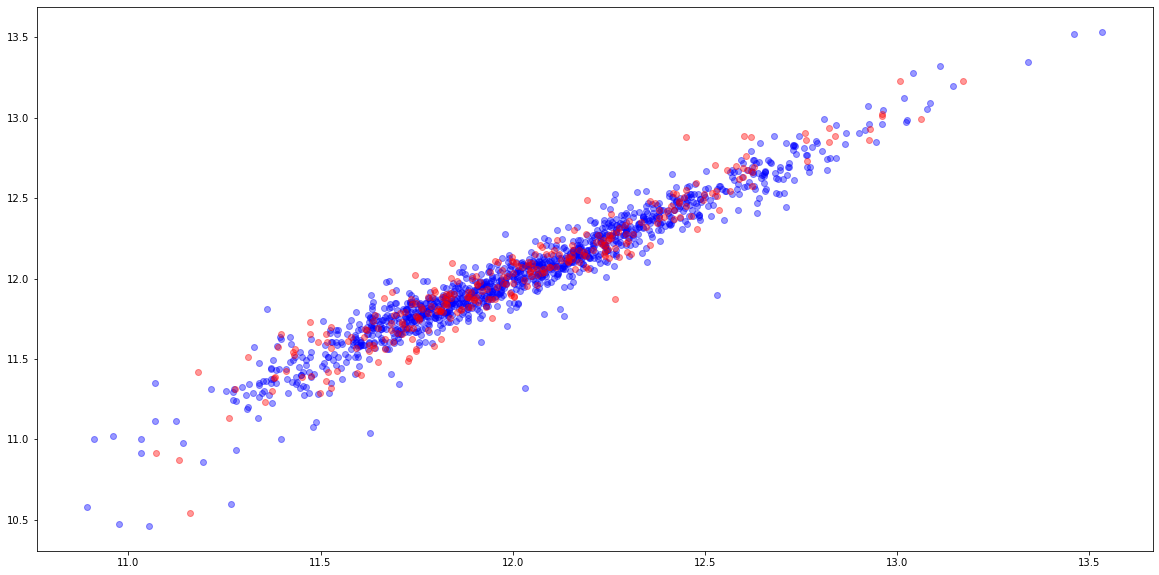

In [27]:
enet = ElasticNet(random_state=0, max_iter=10000)

alphas = np.logspace(-3, -1, 30)
rhos = np.logspace(-3, -1, 30)

gparam_enet = {'l1_ratio': rhos, 'alpha': alphas}

gs_enet = GridSearchCV(enet, gparam_enet, cv=n_folds, refit=True, n_jobs=-1,
                       scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_enet.best_params_)

print('where the alpha is: ', gs_enet.best_params_['alpha'])
print('and the L1 ratio is: ', gs_enet.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_enet.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_enet, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.scatter(gs_enet.cv_results_['param_alpha'], gs_enet.cv_results_['mean_test_score'])

plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

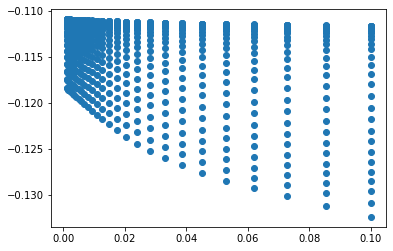

In [28]:
# These graphs do not show us much, but they are fun to see :]

plt.scatter(gs_enet.cv_results_['param_l1_ratio'], gs_enet.cv_results_['mean_test_score'])